In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
Data = pd.read_csv('/Users/Navaneethan/Documents/Freelancing/Linear Regression/Suppoerting material.csv',index_col='Run' )

In [3]:
Data_L = Data.loc['1 L':'82 L']
Data_L

,TCP (%),SSG (%),Screen size (mm),Screen shape square,Screen shape round,Water (%),Particle size (%)> 500 µm,Particle size (%)250 - 500 µm,Particle size (%)150 - 250 µm,Particle size (%)0 - 150 µm,Compression Pressure (MPa),Ha (mm),Hb (mm),Hc (mm),Db (mm),Dc (mm),IAR (%),CAR (%),VSR (%),Elastic work (Nm)
Run,,,,,,,,,,,,,,,,,,,,
1 L,12.5,12.25,0.85,1,0,26.5,30.9,22.8,15.6,35.8,104.09,2.55,2.87,2.93,6,6.01,12.29,14.94,15.45,-0.20
2 L,12.5,12.25,0.85,1,0,26.5,30.9,22.8,15.6,35.8,138.78,2.47,2.82,2.88,6,6.02,14.27,16.94,17.72,-0.34
3 L,12.5,12.25,0.85,1,0,26.5,30.9,22.8,15.6,35.8,173.48,2.47,2.87,2.88,6,6.00,16.11,16.79,16.66,-0.50
4 L,17.5,8.75,0.85,1,0,26.5,23.8,19.0,20.3,35.9,69.39,2.86,3.14,3.18,6,6.01,9.68,11.02,11.39,-0.11
5 L,17.5,8.75,0.85,1,0,26.5,23.8,19.0,20.3,35.9,104.09,2.64,2.95,2.97,6,6.02,11.68,12.26,12.89,-0.21
6 L,17.5,8.75,0.85,1,0,26.5,23.8,19.0,20.3,35.9,138.78,2.43,2.78,2.78,6,6.02,14.12,14.40,15.16,-0.34
7 L,17.5,8.75,0.85,1,0,26.5,23.8,19.0,20.3,35.9,173.48,2.31,2.70,2.72,6,6.01,16.98,17.47,18.00,-0.50
8 L,15.0,14.00,0.85,1,0,17.4,26.3,22.4,15.4,36.6,69.39,3.04,3.32,3.32,6,6.03,9.44,9.13,10.10,-0.11
9 L,15.0,14.00,0.85,1,0,17.4,26.3,22.4,15.4,36.6,104.09,2.61,2.92,2.95,6,6.02,11.91,13.06,13.94,-0.21


# Laboratory scale sample runs

### Linear Regression with K-Fold Cross Validation for IAR as Response Variable

In [4]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [16]:
X = pd.DataFrame(Data_L[['TCP (%)','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_L['IAR (%)'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    
print('Individual scores:',scores)
print('Average score:', sum(scores)/len(scores))

Individual scores: [0.8794956850483815, 0.9310074294738994]
Average score: 0.9052515572611404


### Ridge, Lasso and ElasticNet Regularization

In [15]:
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
X = pd.DataFrame(Data_L[['TCP (%)','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_L['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 0.95517309192303
Ridge regression test score: 0.7960325281610516
RSquare value(test): 79.6
MSE for test data: 1.09


In [18]:
X = pd.DataFrame(Data_L[['TCP (%)','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_L['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),2))

Lasso regression train score: 0.9315804567169628
Lasso regression test score: 0.7315954422718289
number of features used:  1
RSquare value(test): 73.16
MSE for test data: 1.43


In [19]:
X = pd.DataFrame(Data_L[['TCP (%)','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_L['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),2))

ElasticNet regression train score: 0.9357300344321715
ElasticNet regression test score: 0.7397520750776472
RSquare value(test): 73.98
MSE for test data: 1.39


# Pilot scale sample runs

### Linear Regression with K-Fold Cross Validation for IAR as Response Variable 

In [20]:
Data_P = Data.loc['1P':'48 P']

In [22]:
X = pd.DataFrame(Data_P[['TCP (%)','SSG (%)','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_P['IAR (%)'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    
print('Individual scores:',scores)
print('Average score:', sum(scores)/len(scores))

Individual scores: [0.9529824717496427, 0.8770222090164475]
Average score: 0.9150023403830451


### Ridge, Lasso and ElasticNet Regularization

In [23]:
X = pd.DataFrame(Data_P[['TCP (%)','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_P['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 0.9623224456894082
Ridge regression test score: 0.9168353383922055
RSquare value(test): 91.68
MSE for test data: 0.63


In [24]:
X = pd.DataFrame(Data_P[['TCP (%)','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_P['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),2))

Lasso regression train score: 0.9588418210082081
Lasso regression test score: 0.9109888532213426
number of features used:  1
RSquare value(test): 91.1
MSE for test data: 0.68


In [25]:
X = pd.DataFrame(Data_P[['TCP (%)','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_P['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),2))

ElasticNet regression train score: 0.9593232436716727
ElasticNet regression test score: 0.9108693975744463
RSquare value(test): 91.09
MSE for test data: 0.68


# Commercial scale sample runs

In [26]:
Data_C = Data.loc['1 C':'36 C']

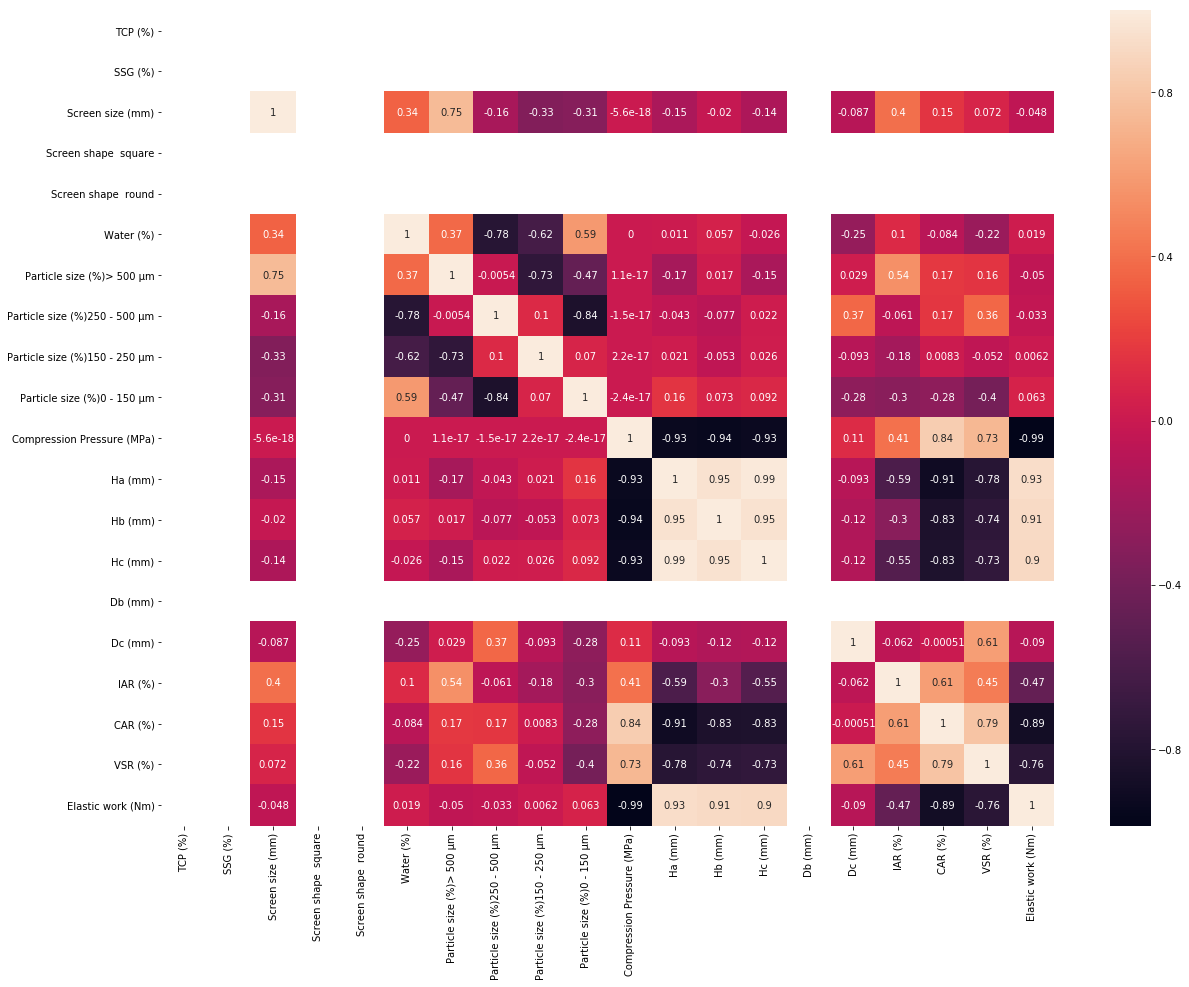

In [41]:
plot.rcParams["figure.figsize"] = [20,15]
sns.heatmap(Data_C.corr(),annot=True)

### Linear Regression with K-Fold Cross Validation for IAR as Response Variable 

In [73]:
X = pd.DataFrame(Data_C[['TCP (%)','SSG (%)','Particle size (%)> 500 µm','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_C['IAR (%)'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    
print('Individual scores:',scores)
print('Average score:', sum(scores)/len(scores))

Individual scores: [0.5383285672316853, 0.3729356018589435]
Average score: 0.4556320845453144


### Ridge, Lasso and ElasticNet Regularization

In [74]:
X = pd.DataFrame(Data_C[['TCP (%)','SSG (%)','Particle size (%)> 500 µm','Compression Pressure (MPa)','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_C['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_rr = Ridge(alpha=0.01)
model_rr.fit(X_train, y_train)

Ridge_train_score = model_rr.score(X_train,y_train)
Ridge_test_score = model_rr.score(X_test, y_test)
Predict_test_ridge = model_rr.predict(X_test)

print("Ridge regression train score:", Ridge_train_score)
print("Ridge regression test score:", Ridge_test_score)
print('RSquare value(test):',np.round(model_rr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ridge),2))

Ridge regression train score: 0.6066819860573167
Ridge regression test score: 0.28155586562704504
RSquare value(test): 28.16
MSE for test data: 4.21


In [76]:
X = pd.DataFrame(Data_C[['TCP (%)','SSG (%)','Compression Pressure (MPa)','Particle size (%)> 500 µm','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_C['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_lr = Lasso()
model_lr.fit(X_train, y_train)
coeff_used = np.sum(model_lr.coef_!=0)

Lasso_train_score = model_lr.score(X_train,y_train)
Lasso_test_score = model_lr.score(X_test, y_test)
Predict_test_Lasso = model_lr.predict(X_test)

print("Lasso regression train score:", Lasso_train_score)
print("Lasso regression test score:", Lasso_test_score)
print("number of features used: ", coeff_used)
print('RSquare value(test):',np.round(model_lr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_Lasso),2))

Lasso regression train score: 0.550548190404418
Lasso regression test score: 0.0037209117012986237
number of features used:  3
RSquare value(test): 0.37
MSE for test data: 5.83


In [66]:
X = pd.DataFrame(Data_C[['TCP (%)','SSG (%)','Compression Pressure (MPa)','Particle size (%)> 500 µm','Particle size (%)150 - 250 µm','Screen shape  round']])
y = pd.DataFrame(Data_C['IAR (%)'])

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)
model_enr = ElasticNet()
model_enr.fit(X_train, y_train)

ElasticNet_train_score = model_enr.score(X_train,y_train)
ElasticNet_test_score = model_enr.score(X_test, y_test)
Predict_test_ElasticNet = model_enr.predict(X_test)

print("ElasticNet regression train score:", ElasticNet_train_score)
print("ElasticNet regression test score:", ElasticNet_test_score)
print('RSquare value(test):',np.round(model_enr.score(X_test, y_test)*100,2))
print('MSE for test data:',np.round(metrics.mean_squared_error(y_test, Predict_test_ElasticNet),2))

ElasticNet regression train score: 0.5829339560729779
ElasticNet regression test score: 0.14683526883921227
RSquare value(test): 14.68
MSE for test data: 4.99
